In [1]:
import numpy as np
import uproot as up
from matplotlib import pyplot as plt
from ipynb.fs.defs.covfit import *
from scipy.stats import chi2

In [2]:
F = up.open("MB_CC0pi_GENIEv3.00.06.root")
[n for n in F.keys() if b"abc" in n]

[]

In [3]:
nu = "antinu"

data = F[f"MiniBooNE_CCQELike_XSec_2DTcos_{nu}_data_1D"]
data = data.numpy()[0]

MC = F[f"MiniBooNE_CCQELike_XSec_2DTcos_{nu}_MC_1D"]
MC = MC.numpy()[0]
MC_scale = np.sum(data) / np.sum(MC)
MC *= MC_scale
print(MC_scale)

cov = F[f"MiniBooNE_CCQELike_XSec_2DTcos_{nu}_COV"]
var = np.diag(cov.numpy()[0]) * 1e-76

1.5173044879071953


In [4]:
# Shape-only p-values
z = np.sqrt((data - MC)**2 / var)
p = {}
p["naive"] = chi2(df=len(z)).sf(naive(z))
p["fitted"] = BEE2(df=len(z)).sf(fitted(z))
p["invariant"] = chi2(df=1).sf(invariant3(z, alpha=2/3))
p

{'naive': 9.113471795997956e-25,
 'fitted': 1.9159893394404826e-05,
 'invariant': 4.127296959532955e-06}

In [5]:
def fun(scale):
    return np.sum((data - scale*MC)**2 / var)

from scipy.optimize import minimize
opt = minimize(fun, 1)
opt

      fun: 249.34161440025395
 hess_inv: array([[1.15556759e-06]])
      jac: array([2.47955322e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 48
      nit: 2
     njev: 18
   status: 2
  success: False
        x: array([0.92155038])

In [12]:
# Fitted p-values
z = np.sqrt((data - opt.x * MC)**2 / var)
p = {}
p["naive"] = chi2(df=len(z)-1).sf(naive(z))
p["fitted"] = BEE2(df=len(z)).sf(fitted(z))
p["invariant"] = chi2(df=1).sf(invariant3(z, alpha=2/3))
p

{'naive': 4.7147328023972437e-20,
 'fitted': 0.00033121307955430446,
 'invariant': 0.0003156359348547304}

(1e-41, 2.3734730823896866e-38)

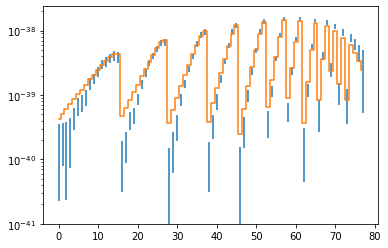

In [14]:
plt.errorbar(np.arange(len(data)), data, np.sqrt(var), linestyle="")
plt.step(np.arange(len(MC)), MC, where="mid")
plt.yscale("log")
plt.ylim(1e-41)